<a href="https://colab.research.google.com/github/Kuroin/Urban-Sound-Classifier-with-CNN/blob/main/urban_sound_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras import Sequential
import pickle
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2


In [ ]:
with open("/content/drive/MyDrive/dataset/X_train.data", 'rb') as f:
    X_train = pickle.load(f)

with open("/content/drive/MyDrive/dataset/X_test.data", 'rb') as f:
    X_test = pickle.load(f)

with open("/content/drive/MyDrive/dataset/y_train.data", 'rb') as f:
    y_train = pickle.load(f)

with open("/content/drive/MyDrive/dataset/y_test.data", 'rb') as f:
    y_test = pickle.load(f)

with open("/content/drive/MyDrive/dataset/X_val.data", 'rb') as f:
    X_val = pickle.load(f)

with open("/content/drive/MyDrive/dataset/y_val.data", 'rb') as f:
    y_val = pickle.load(f)


In [ ]:
classes = {
    0 : "Air Conditier",
    1 : "Car Horn",
    2 : "Children Playing",
    3 : "Dog Bark",
    4 : "Drilling",
    5 : "Engine Idling",
    6 : "Gun Shot",
    7 : "Jackhammer",
    8 : "Siren",
    9 : "Street Music"
}

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
X_test.shape

(1311, 128, 128)

In [ ]:
y_train = list(map(int, y_train))
y_test = list(map(int, y_test))
y_val = list(map(int, y_val))

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(
    32,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation="relu",
    input_shape=(128,128,1)
))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(
    64,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation="relu",
))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(
    128,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation="relu",
))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(
    128,
    kernel_size=(3,3),
    strides=(1,1),
    padding="same",
    activation="relu",
))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
results = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=150,
    validation_data=(X_val,y_val),
)

Epoch 1/150
191/191 [==============================] - 17s 26ms/step - loss: 1.7624 - accuracy: 0.3185 - val_loss: 1.3162 - val_accuracy: 0.4462
Epoch 2/150
191/191 [==============================] - 4s 21ms/step - loss: 1.2787 - accuracy: 0.4956 - val_loss: 0.8466 - val_accuracy: 0.7002
Epoch 3/150
191/191 [==============================] - 4s 21ms/step - loss: 1.0178 - accuracy: 0.6119 - val_loss: 0.7614 - val_accuracy: 0.7246
Epoch 4/150
191/191 [==============================] - 4s 21ms/step - loss: 0.8531 - accuracy: 0.6815 - val_loss: 0.5795 - val_accuracy: 0.8429
Epoch 5/150
191/191 [==============================] - 4s 21ms/step - loss: 0.7343 - accuracy: 0.7376 - val_loss: 0.4625 - val_accuracy: 0.9100
Epoch 6/150
191/191 [==============================] - 4s 23ms/step - loss: 0.6082 - accuracy: 0.7828 - val_loss: 0.3310 - val_accuracy: 0.9130
Epoch 7/150
191/191 [==============================] - 4s 22ms/step - loss: 0.5260 - accuracy: 0.8250 - val_loss: 0.2609 - val_accuracy

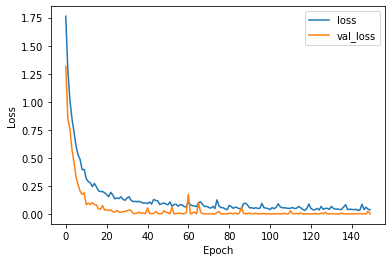

In [ ]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

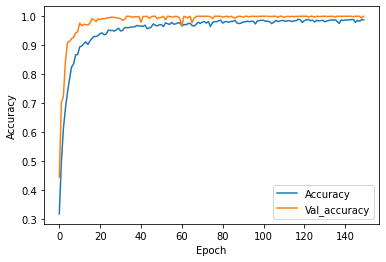

In [ ]:
plt.plot(results.history["accuracy"], label="Accuracy")

plt.plot(results.history["val_accuracy"], label="Val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 10ms/step - loss: 8.1833e-06 - accuracy: 1.0000


[8.183276804629713e-06, 1.0]

In [27]:
path=glob("/content/drive/MyDrive/spectrograms/3/*.png")

image=cv2.imread(path[32])
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray,(128,128))
normalized_img=resized_img/255

prediction_result = model.predict(normalized_img.reshape(1,128,128))

predicted_class = classes[prediction_result.argmax()]
predicted_probability = prediction_result.max()
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class Dog Bark with 1.0 probability %
